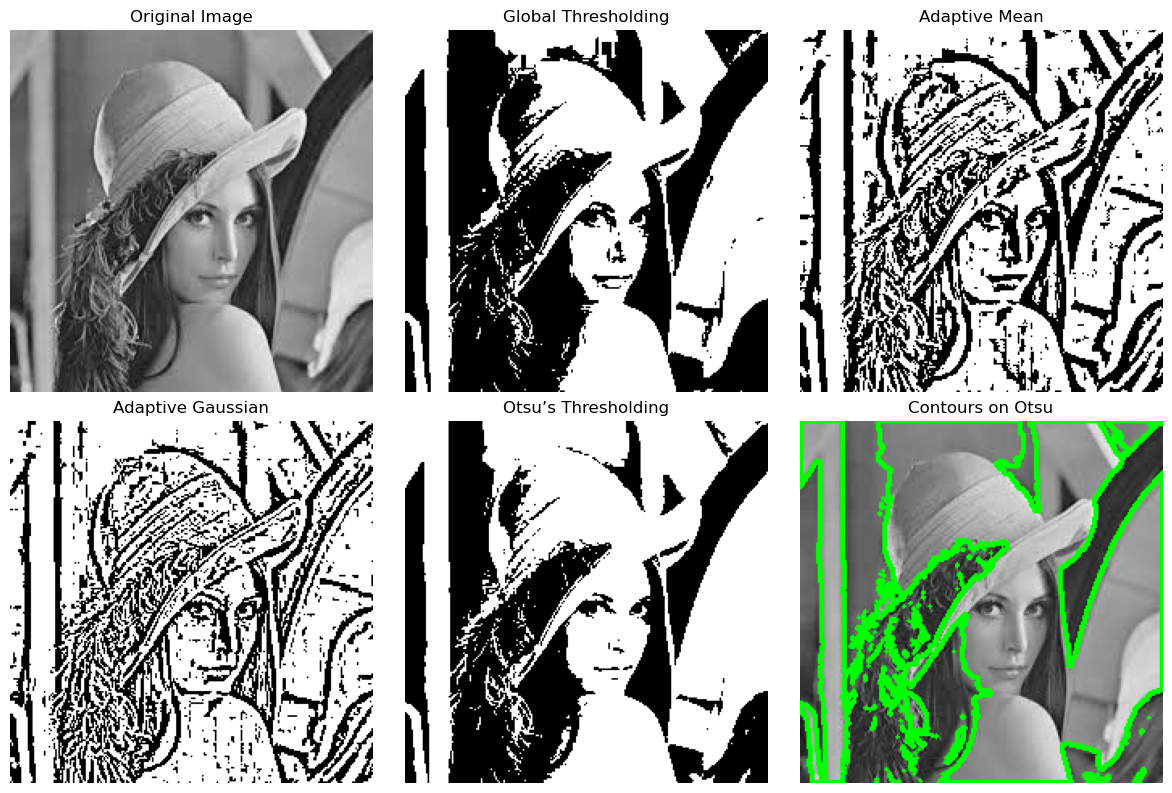

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# === Read and convert image ===
img = cv2.imread("lena.jpeg", cv2.IMREAD_GRAYSCALE)  # Replace with your image path
if img is None:
    raise FileNotFoundError("Image not found. Check your path.")

# === 1. Global Thresholding ===
_, th_global = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# === 2. Adaptive Thresholding (Mean and Gaussian) ===
th_adaptive_mean = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                         cv2.THRESH_BINARY, 11, 2)
th_adaptive_gauss = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                          cv2.THRESH_BINARY, 11, 2)

# === 3. Otsu's Thresholding ===
_, th_otsu = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# === Find contours on Otsu's result ===
contours, _ = cv2.findContours(th_otsu, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
img_contours = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
cv2.drawContours(img_contours, contours, -1, (0, 255, 0), 2)

# === Display results ===
titles = ['Original Image', 'Global Thresholding', 
          'Adaptive Mean', 'Adaptive Gaussian', 
          'Otsu’s Thresholding', 'Contours on Otsu']
images = [img, th_global, th_adaptive_mean, th_adaptive_gauss, th_otsu, img_contours]

plt.figure(figsize=(12, 8))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    if i == 5:
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()
